In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit import DataStructs
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\Administrator\\Desktop\\reaction_regression.csv")
smile1 = []
smile2 = []
for i,row in data.iterrows():
    strings = data["AAM"][i]
    str1,str2 = strings.split(">>",1)
    smile1.append(str1)
    smile2.append(str2)
print(smile1[1])
print(smile1)
print(smile2)
np.array(smile1)
np.array(smile2)

[C:1]1([H:8])([H:9])[O:2][C@@:3]2([H:10])[C@@:4]3([H:11])[O:5][C@:6]1([H:12])[C@@:7]23[H:13]
['[O:1]([C:2]([C:3]([C:4](=[O:5])[C:6]([O:7][H:15])([H:13])[H:14])([H:11])[H:12])([H:9])[H:10])[H:8]', '[C:1]1([H:8])([H:9])[O:2][C@@:3]2([H:10])[C@@:4]3([H:11])[O:5][C@:6]1([H:12])[C@@:7]23[H:13]', '[C:1]([C@@:2]1([H:11])[C@@:3]2([H:12])[C:4]([H:13])([H:14])[C:5]([H:15])=[C:6]([H:16])[C@@:7]12[H:17])([H:8])([H:9])[H:10]', '[C:1]([O:2][C:3]([C@@:4]([C:5]([H:14])([H:15])[H:16])([C:6]([O:7][H:19])([H:17])[H:18])[H:13])([H:11])[H:12])([H:8])([H:9])[H:10]', '[C:1]([C:2]#[C:3][C:4]([C:5](=[O:6])[H:12])([H:10])[H:11])([H:7])([H:8])[H:9]', '[O:1]=[c:2]1[n:3]([H:7])[c:4]([H:8])[n:5][o:6]1', '[C:1](/[C:2](=[N:3]\\[O:4][H:10])[C:5]#[C:6][H:11])([H:7])([H:8])[H:9]', '[O:1]=[C:2]1[N:3]([H:7])[C:4]([H:8])([H:9])[C:5]([H:10])([H:11])[O:6]1', '[N:1]#[C:2][C@@:3]1([H:8])[C:4]([H:9])([H:10])[N:5]=[C:6]([H:11])[N:7]1[H:12]', '[N:1]([C:2]([C@@:3]([N:4]([H:12])[H:13])([C:5]#[N:6])[H:11])([H:9])[H:10])([H:7])[H:8]'

array(['[C:3](=[C:4]=[O:5])([H:11])[H:12].[C:6]([O:7][H:15])([H:8])([H:13])[H:14].[O:1]=[C:2]([H:9])[H:10]',
       '[C:1]1([H:8])([H:9])[O:2][C:3]([H:10])=[C:7]([H:13])[C@:6]1([O+:5]=[C-:4][H:11])[H:12]',
       '[C:1]([C@@:2]1([H:11])[C:3]([H:12])([H:13])[C:4]([H:14])=[C:5]([H:15])[C:6]([H:16])=[C:7]1[H:17])([H:8])([H:9])[H:10]',
       '[C-:1]([O+:2]=[C:3]([C@@:4]([C:5]([H:14])([H:15])[H:16])([C:6]([O:7][H:19])([H:17])[H:18])[H:13])[H:12])([H:8])[H:10].[H:9][H:11]',
       '[C:1]([C:2](=[C:3]=[C:4]([H:10])[H:11])[C:5](=[O:6])[H:12])([H:7])([H:8])[H:9]',
       '[N:3]([C:4]#[N:5])([H:7])[H:8].[O:1]=[C:2]=[O:6]',
       '[C:1]([C@:2]12[N:3]([O:4][H:10])[C@@:6]1([H:11])[C:5]2)([H:7])([H:8])[H:9]',
       '[C:5](=[O:6])([H:10])[H:11].[O:1]=[C:2]1[N:3]([H:7])[C:4]1([H:8])[H:9]',
       '[N:1]1=[C:6]([H:11])[N:7]([H:12])[C@@:3]2([H:8])[C:2]1=[N:5][C:4]2([H:9])[H:10]',
       '[N:1]([C:2]([C:3]([N:4]([H:12])[H:13])=[C:5]=[N:6][H:11])([H:9])[H:10])([H:7])[H:8]',
       '[C:1]([C:2](=[O:3])[

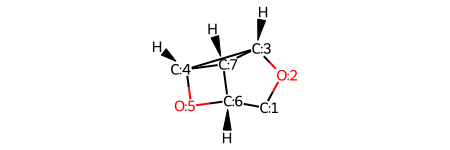

In [3]:
from rdkit.Chem import AllChem
ml = []
for i in smile1:
    ml_1 = Chem.MolFromSmiles(i)
    ml.append(ml_1)
display(ml[1])
display(ml)


In [4]:
smile_1 = Chem.MolToSmiles(ml[1])
display(smile_1)

'[CH2:1]1[O:2][C@H:3]2[C@H:4]3[O:5][C@@H:6]1[C@@H:7]23'

In [5]:
MFP = []
for i in ml:
    MFP1 = AllChem.GetMorganFingerprint(i,2)
    MFP.append(MFP1)
display(MFP[1])
display(MFP)

In [6]:
MFP_bits = []
for i in ml:
    MFP_bits1 = AllChem.GetMorganFingerprintAsBitVect(i,2,nBits=1024)
    MFP_bits.append(MFP_bits1)
display(MFP_bits[1])
display(MFP_bits)

In [7]:
arr = np.zeros((0,), dtype=np.int8)
arr

array([], dtype=int8)

In [8]:
a = 0
for i in range(0,len(MFP_bits)):
    DataStructs.ConvertToNumpyArray(MFP_bits[i],arr)
    a+=1
    print(arr,a)
print(len(MFP_bits))

[0 0 0 ... 0 0 0] 1
[0 0 0 ... 0 0 0] 2
[0 0 0 ... 0 0 0] 3
[0 1 0 ... 0 0 0] 4
[0 0 0 ... 0 0 0] 5
[0 0 0 ... 0 0 0] 6
[0 0 0 ... 0 0 0] 7
[0 0 0 ... 0 0 0] 8
[0 0 0 ... 0 0 0] 9
[0 1 0 ... 0 0 0] 10
[0 1 0 ... 0 0 0] 11
[0 0 0 ... 0 0 0] 12
[0 0 0 ... 0 0 0] 13
[0 0 0 ... 0 0 0] 14
[0 0 0 ... 0 0 0] 15
[0 0 0 ... 0 0 0] 16
[0 0 0 ... 0 0 0] 17
[0 0 0 ... 0 0 0] 18
[0 0 0 ... 0 0 0] 19
[0 0 0 ... 0 0 0] 20
[0 0 0 ... 0 0 0] 21
[0 0 0 ... 0 0 0] 22
[0 0 0 ... 0 0 0] 23
[0 0 0 ... 0 0 0] 24
[0 0 0 ... 0 0 0] 25
[0 0 0 ... 0 0 0] 26
[0 0 0 ... 0 0 0] 27
[0 0 0 ... 0 0 0] 28
[0 1 0 ... 0 0 0] 29
[0 0 0 ... 0 0 0] 30
[0 1 0 ... 0 0 0] 31
[0 0 0 ... 0 0 0] 32
[0 0 0 ... 0 0 0] 33
[0 0 0 ... 0 0 0] 34
[0 1 0 ... 0 0 0] 35
[0 0 0 ... 0 0 0] 36
[0 0 0 ... 0 0 0] 37
[0 0 0 ... 0 0 0] 38
[0 0 0 ... 0 0 0] 39
[0 0 0 ... 0 0 0] 40
[0 0 0 ... 0 0 0] 41
[0 0 0 ... 0 0 0] 42
[0 0 0 ... 0 0 0] 43
[0 0 0 ... 0 0 0] 44
[0 0 0 ... 0 0 0] 45
[0 1 0 ... 0 0 0] 46
[0 0 0 ... 0 0 0] 47
[0 0 0 ... 0 0 0] 48
[